# PCA: Principal Component Analysis

En estadística, el análisis de componentes principales (en español ACP, en inglés, PCA) es una técnica utilizada para describir un conjunto de datos en términos de nuevas variables ("componentes") no correlacionadas. Los componentes se ordenan por la cantidad de varianza original que describen, por lo que la técnica es útil para reducir la dimensionalidad de un conjunto de datos. 

El ACP construye una transformación lineal que escoge un nuevo sistema de coordenadas para el conjunto original de datos en el cual la varianza de mayor tamaño del conjunto de datos es capturada en el primer eje (llamado el Primer Componente Principal), la segunda varianza más grande es el segundo eje, y así sucesivamente. Para construir esta transformación lineal debe construirse primero la matriz de covarianza o matriz de coeficientes de correlación. Debido a la simetría de esta matriz existe una base completa de vectores propios de la misma. La transformación que lleva de las antiguas coordenadas a las coordenadas de la nueva base es precisamente la transformación lineal necesaria para reducir la dimensionalidad de datos. Además las coordenadas en la nueva base dan la composición en factores subyacentes de los datos iniciales. 
El ACP es particularmente útil para reducir la dimensionalidad de un grupo de datos. Los primeros componentes principales describen la mayor parte de la varianza de los datos (más cuanto más correlacionadas estuvieran las variables originales). Estos componentes de bajo orden a veces contienen el aspecto "más importante" de la información, y los demás componentes se pueden ignorar. Existen diferentes técnicas para estimar el número de componentes principales que son relevantes; la técnica más apropiada dependerá de la estructura de correlaciones en los datos originales.

In [1]:
# Se importan las librerías necesarias
# Arreglos
import pandas as pd
import numpy as np

# Estadística
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Visualización
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams["figure.figsize"]=(16,9)

In [2]:
# Se cargan los datos de entrada del csv
data=pd.read_csv("../Data/compra_alquilar.csv")
data.head(10)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


In [3]:
# Preprocesamiento de datos
# Se elimina la variable dependiente "comprar"
df=data.drop(["comprar"],axis=1)

# Se hace uso del método de skelearn para normalizar los datos
scaler=StandardScaler()
scaler.fit(df) 
x_scaled=scaler.transform(df) 

In [4]:
# Se instancia un objeto de la clase PCA y se aplica a los datos
# Para este caso se desea transformar a las 9 variables independientes (componentes)
pca=PCA(n_components=9)
 
# Obtener los componentes principales (eigenvectores)
pca.fit(x_scaled) 
# Transformar los puntos a otro hiperplano
# Este método realiza el producto punto de cada fila con cada eigenvector de la matriz de covarianzas
x_pca=pca.transform(x_scaled)

# Varianza explicada por cada componente 
expl=pca.explained_variance_ratio_
print(expl)

# Suma acumulada de la varianza explicada por los primeros 5 componentes principales
print("Suma acumulada de la varianza explicada por los primeros 5 componentes principales:",sum(expl[0:5]))

[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
Suma acumulada de la varianza explicada por los primeros 5 componentes principales: 0.852406211771431


Si se utilizan los primeros 5 componentes para cada dato se obtiene el 85% de la información.

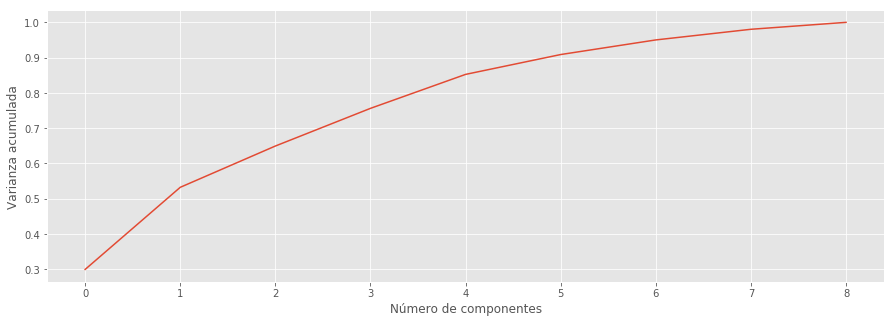

In [5]:
# Se grafica el acumulado de la varianza explicada en las nueve dimensiones (componentes)
plt.figure(figsize=(15,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada")
plt.show()

In [6]:
# DataFrame que contiene los datos a los que se les aplicó la transformación lineal 
pd.DataFrame(x_pca)

,0,1,2,3,4,5,6,7,8
0,-1.321915,-0.222950,-1.599863,-0.885014,0.646617,-0.700208,-0.318031,0.751809,0.269984
1,-1.147878,1.716967,-0.395722,-0.447960,-0.687805,-0.231969,-1.542487,-0.221799,0.438425
2,-0.090369,1.836066,-1.359382,0.337505,0.742387,0.593030,1.540495,-0.668120,0.153463
3,-3.455898,-0.078279,0.202382,-1.573584,-0.068551,-0.051945,-0.909409,-0.684486,-0.129045
4,-0.916933,-1.184676,-0.190036,0.117804,-0.147753,-0.619750,0.450419,-0.194341,0.687452
5,-0.161676,1.587698,-0.421924,-1.881290,-0.156431,-1.025022,-0.560932,1.047429,0.163519
6,-1.329297,0.619830,1.829433,0.399544,0.035830,-0.350927,0.018704,-0.142383,0.032907
7,-2.729158,-0.770155,-2.273386,0.271459,0.303292,0.419120,-0.283308,-0.057391,0.020380
8,-1.409056,-0.862594,0.021553,0.279711,1.080635,-0.705776,0.880727,-0.005343,0.026373
9,-0.414685,1.455438,2.080682,-0.549614,0.265018,0.259259,0.638691,-0.388385,0.424582


Los primeros 4 componentes describen la mayor parte de la varianza de los datos. Los demás componentes no aportan mucha información por lo que pueden despreciarse.